# 01 Markov State Model

In [1]:
using PyPlot
using Revise, MDToolbox
ENV["COLUMNS"] = 100; # display width for MDToolbox
ENV["JULIA_NUM_THREADS"] = 4 # threads used in Julia

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1278


4

In [2]:
#t = load("../ak.pdb")
t = load("data/1yrf.pdb")

1x582 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 1LEU                       |  …   35PHE                      |
| 1N                         | 2H1                        |  …   582OXT                     |
|    -7.40     9.81     7.91 |    -8.22     9.66     7.60 |  …     -14.90    16.49     8.30 |

In [3]:
index = select_atom(t, "atomname CA")

35-element Array{Int64,1}:
   5
  24
  35
  47
  62
  74
  94
 116
 126
 142
 162
 169
 186
   ⋮
 365
 387
 404
 421
 438
 457
 479
 501
 516
 538
 545
 564

In [4]:
t[:, index]

1x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |

In [5]:
#t = load("../ak.nc", index=index, top=t)
t = load("data/all_stride100.nc", index=index, top=t)

325001x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |
|    45.52   -13.34    39.18 |    49.36   -13.09    38.64 |         41.88     2.56    46.47 |
|    47.60   -14.15    34.86 |    51.09   -13.00    36.01 |         42.84     5.06    48.31 |
|    45.56   -13.17    36.88 |    49.31   -12.53    37.23 |         41.19     1.18    47.38 |
|    46.26   -12.63    36.16 |    50.06   -12.71    36.70 |         40.38     3.74    46.40 |
|    49.31   -16.29    35.70 |    51.93   -13.69    34.74 |  …      40.41     2.54    47.74 |
|    49.95   -16.06    34.63 |    52.57   -13.36    35.52 |         41.14     4.71    47.48 |
|    45.35   -14.80    37.

In [6]:
t = superimpose(t[1, :], t)

325001x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |
|    -2.06     8.40    10.61 |     0.07    11.41     9.41 |        -18.33    12.93     4.76 |
|     2.00     8.02     8.67 |     2.43    11.77     7.87 |        -20.31    15.15     3.78 |
|    -0.78     7.63     9.59 |     0.48    11.13     8.71 |        -18.23    12.07     6.25 |
|    -0.47     8.00     8.75 |     1.24    11.43     8.50 |        -19.65    11.88     3.81 |
|     3.86     9.65    10.57 |     4.10    11.87     7.47 |  …     -19.61    12.03     5.84 |
|     4.48     9.05     8.98 |     3.67    12.33     7.12 |        -20.62    13.61     4.17 |
|    -0.70     7.01    10.

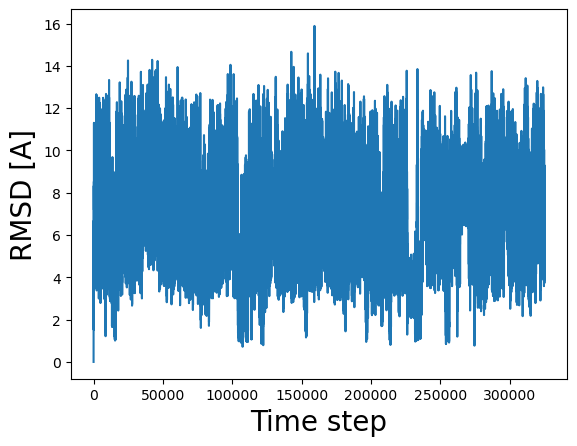

PyObject Text(38.00000000000001, 0.5, 'RMSD [A]')

In [14]:
rmsd = compute_rmsd(t[1, :], t)
plot(rmsd)
xlabel("Time step",fontsize=20)
ylabel("RMSD [A]",fontsize=20)

In [11]:
?Style

search: Style IndexStyle printstyled ksdensity_serial



```
Style(style_type)
Style(style_type, options)
```

A style for a molecular visualisation, with an optional `Dict` of options. Examples are `Style("cartoon")` and `Style("cartoon", Dict("color"=> "spectrum", "ribbon"=> true, "thickness"=> 1.0))`.


In [12]:
using Bio3DView
viewstruc(t[1, :], style=Style("sphere", Dict("color"=> "spectrum")))

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

# Feature extraction and dimensional reduction

First, we compute distance-map vectors for each fram by calling `compute_distancemap()` function

In [13]:
X = compute_distancemap(t)

325001×528 Array{Float64,2}:
 7.89933  5.85188   5.94069   9.49252  10.2384  …  5.26846  6.27684  7.49441   9.66232  8.88368
 8.50817  7.00025   9.64637  12.595    13.5787     6.74683  6.47582  8.17173   9.44661  8.55033
 8.04062  6.47848   9.32129  11.8972   13.1739     5.88217  4.61305  7.75496   8.00677  7.87567
 8.24729  6.7526    9.33815  12.149    12.5471     6.40686  8.33347  7.9987   10.943    9.66315
 8.12258  5.82863   8.14704  10.921    11.5195     6.4681   7.49529  8.05406  10.0904   8.81301
 9.05469  8.69891  12.0555   14.0325   15.4729  …  6.86724  8.59181  8.47824  11.1277   9.58356
 8.29563  7.24198   9.90614  12.2051   13.4218     6.4855   7.12913  8.21236  10.1123   9.06676
 8.77351  7.84755  10.6097   13.1113   13.3386     6.62716  6.32367  8.25358   9.06616  8.43631
 7.6784   6.87895  10.0293   12.3521   13.6506     6.55582  7.37944  8.33597  10.3802   8.93563
 8.87195  7.54684   9.67746  12.5864   13.5665     6.50601  6.36308  8.2513    9.546    8.67297
 8.43729  6

In [48]:
#PCA = pca(X)
TICA = tica(X, 100)

(projection = [-0.18033379647567271 -0.04373676333184295 … -0.046867970752883965 -0.027620557459550096; -0.25278732987652 -0.07750072034732125 … 0.07847181241112676 -0.001175636550497414; … ; 0.226373318960782 -0.010899822749406568 … 0.04113281190132962 -0.03695553709433499; 0.13815873354312164 -0.02161025454763496 … -0.3021101718190027 -0.08935273988544817], mode = [-2.733525679964712e-5 0.0005333669848807368 … 0.002335333707180584 -0.0008827130911521764; -7.169188338839844e-5 -0.0005609749313049144 … -0.0014771148197267779 0.0012375654820573046; … ; -0.009133226519649587 0.0016331665010529373 … -0.0002471504422214532 0.00902481958296005; 0.000542718535780709 -0.00046396019962738675 … -0.0006223841937457105 -0.00317751394104039], variance = [0.9432688803426968, 0.9336574819081327, 0.9009147394119769, 0.869465084003377, 0.8502762271399039, 0.802466732441991, 0.78327680939232, 0.763389366213955, 0.7402298115374595, 0.7306576337076901  …  -0.0896218305047613, -0.09305273386920178, -0.096

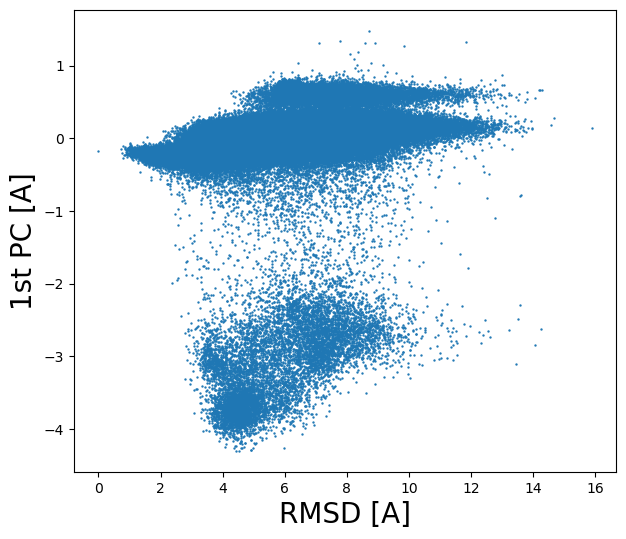

PyObject Text(38.0, 0.5, '1st PC [A]')

In [49]:
#pyplot(size=(500,400))
#scatter(F.projection[:, 1], F.projection[:, 2], markersize=2.0, color=:black, label=nothing, framestyle=:box)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(rmsd, TICA.projection[:, 1], s=0.5)
#ax.scatter(TICA.projection[:, 1], TICA.projection[:, 2], s=0.5)
xlabel("RMSD [A]",fontsize=20)
ylabel("1st PC [A]",fontsize=20)

# Clustering

In [50]:
CLUST = clusterkcenters(F.projection[:, 1:5], 100)

1 iteration  distance_max = 0.884233  kcluster = 100
2 iteration  distance_max = 0.873805  kcluster = 100
3 iteration  distance_max = 0.873805  kcluster = 100
4 iteration  distance_max = 0.873805  kcluster = 100
5 iteration  distance_max = 0.867899  kcluster = 100
6 iteration  distance_max = 0.867899  kcluster = 100
7 iteration  distance_max = 0.867899  kcluster = 100
8 iteration  distance_max = 0.867899  kcluster = 100
9 iteration  distance_max = 0.867899  kcluster = 100
10 iteration  distance_max = 0.867899  kcluster = 100


(indexOfCluster = [98, 98, 98, 98, 98, 98, 98, 98, 98, 98  …  1, 1, 1, 1, 1, 1, 71, 1, 1, 1], center = [0.24764119127904974 -0.019302558289232427 … -0.10758058272920591 0.9507531327978933; 0.2960753681557566 -0.0202044224799975 … -0.892988803288403 -5.157450538928011; … ; -3.7504683937217376 0.18450091798145313 … 0.38394959219017466 -0.032176715173972914; 0.3360852578747199 -0.08390183144998123 … -0.6529265956178989 2.624475751651187], distanceFromCenter = [0.0902953639635724; 0.11850300837815846; … ; 0.2235002131105296; 0.39489690430919044], indexOfCenter = [322420, 296602, 135661, 193299, 265485, 98456, 160331, 25756, 258168, 136725  …  277504, 250637, 25863, 98957, 39874, 11153, 41345, 123440, 96867, 125415])

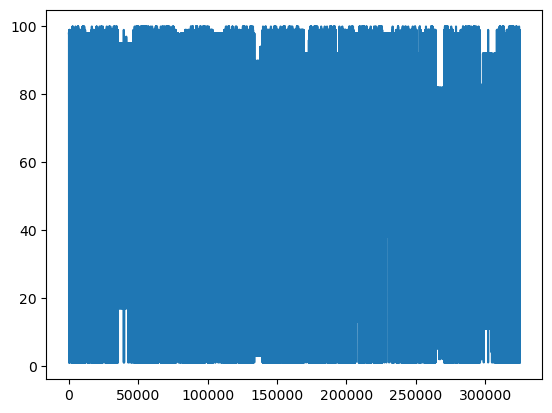

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8448f02e50>

In [51]:
plot(CLUST.indexOfCluster)

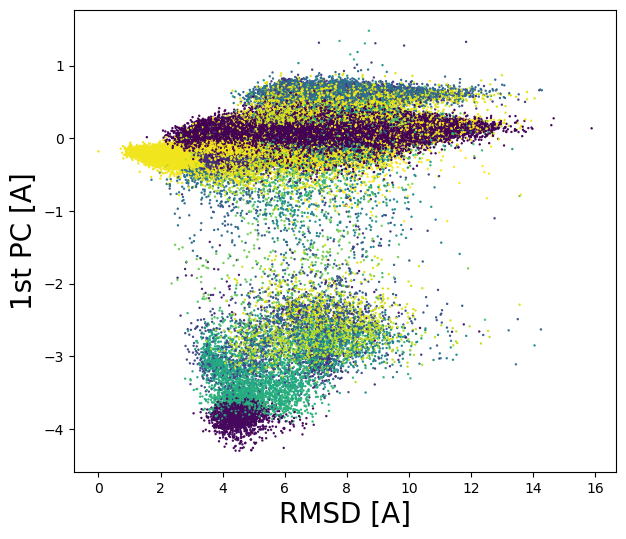

PyObject Text(38.0, 0.5, '1st PC [A]')

In [52]:
#gr(size=(500,400))
#scatter(PCA.projection, PCA.projection, markersize=2.0, color=CLUST.indexOfCluster, label=nothing, framestyle=:box)
#        markerstrokewidth = 0.1)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(rmsd, TICA.projection[:, 1], s=0.5, c=CLUST.indexOfCluster)
xlabel("RMSD [A]",fontsize=20)
ylabel("1st PC [A]",fontsize=20)

In [191]:
GC.gc()

# Estimation of transition probability matrix from data

Likelihood function of observing the data given a transition probability matrix $T$

\begin{aligned}
  L(T) =  P({\rm data} | T) = \prod_i \prod_j T_{ij}^{C_{ij}}
\end{aligned}

Here, $C_{ij}$ is a counting matrix whose elements represents the number of transitions between states obesrved in the given data

First, we compute the counting matrix from the result of the clustering

In [53]:
# compute counting matrix
C = msmcountmatrix(CLUST.indexOfCluster, tau=100)

100×100 Array{Int64,2}:
 121016   0    0    1  0   0  4  1  354  0   411  0  …  1   14    65  6332  0   3894  12610  441
      2  46    0    0  0   0  0  0    2  0     0  0     0    0     0     0  0      0      0    0
      0   0  812    0  0   0  0  0    0  6     0  0     0    0     0     0  0      0      0    0
      0   0    0  108  0   0  0  0   19  0    35  0     0    0     0     0  0      0      0    0
      0   0    0    0  0   0  0  0    0  0     0  0     0    0     0     0  0      0      0    0
      0   0    0    0  0   2  0  0    0  0     0  0  …  0   15     0     0  0      0      1    0
      3   0    0    0  0   0  0  0    0  0     0  0     0    0     0     0  0      0      1    0
      1   0    0    0  0   0  0  0    0  0     0  0     1    1     0     0  0      0      0    0
    274   3    0    8  0   0  0  0  526  0     0  0     0    0     0    49  0      0     66    3
      1   0    4    0  0   0  0  0    0  1     0  0     0    0     0     0  0      1      0    0
    24

Then, we estimate the transition probability matrix by maximizing the likelihood function given above

In [55]:
T, p = msmtransitionmatrix(C)

10 iteration  LogLikelihood = -3.79681e+05  delta = 1.36156e-02  tolerance = 1.00000e-04
20 iteration  LogLikelihood = -3.79681e+05  delta = 3.04807e-03  tolerance = 1.00000e-04
30 iteration  LogLikelihood = -3.79681e+05  delta = 7.18271e-04  tolerance = 1.00000e-04
40 iteration  LogLikelihood = -3.79681e+05  delta = 1.80888e-04  tolerance = 1.00000e-04


([0.7807892248414603 6.448342681053981e-6 … 0.08142385913703622 0.0028479041770555556; 0.0035605863858971967 0.1636954416303281 … 0.0 0.0; … ; 0.4870858238492418 0.0 … 0.32222935306801587 0.0043407812487826925; 0.6465519049303702 0.0 … 0.16473736517216242 0.017569427182127673], [0.47844266926943885, 0.00086647589759576, 0.004982354085360922, 0.0010503451470554041, 9.25119812625696e-6, 0.00023111675449033345, 1.2347228862963619e-5, 7.397643677560962e-5, 0.006937122085573381, 0.00011957543697283203  …  0.009105894074641907, 0.04053849882805635, 0.00013251749707110812, 0.0017320283266603947, 0.01376863553604908, 0.030523450425270125, 3.0794028273830743e-6, 0.12031129500716072, 0.079979023408819, 0.0021074238060450603])

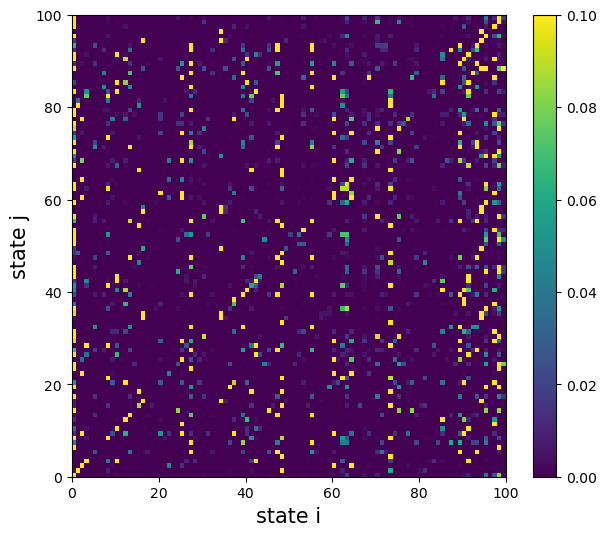

PyObject Text(30.000000000000007, 0.5, 'state j')

In [56]:
#pyplot(size=(500,400))
#heatmap(T, aspect_ratio=:equal, color=:thermal, clim=(0, 1))
#xlabel!("state i"); ylabel!("state j")

fig, ax = subplots(figsize=(7, 6))
p = ax.pcolor(T, vmin=0, vmax=0.1)
cbar = fig.colorbar(p, ax=ax)
#ax.colorbar()
xlabel("state i",fontsize=15)
ylabel("state j",fontsize=15)

In [57]:
msmplot(T, x=rmsd[CLUST.indexOfCenter], y=CLUST.center[:, 1], filename="msm.png", dpi=150)

# Validation

In [58]:
tau = 1:5:100
implied_time = msmimpliedtime(F2.indexOfCluster, tau)

20×99 Array{Union{Missing, Float64},2}:
  414.801   143.653   71.4867   26.3382   23.4399  …  missing  missing  missing  missing  missing
 1969.38    615.944  257.996   120.268   107.957      missing  missing  missing  missing  missing
 3317.0    1036.54   367.601   213.071   177.15       missing  missing  missing  missing  missing
 4089.7    1349.65   450.313   276.003   233.115      missing  missing  missing  missing  missing
 4935.29   1645.25   512.19    351.505   284.48       missing  missing  missing  missing  missing
 5859.32   1912.4    569.165   404.706   333.308   …  missing  missing  missing  missing  missing
 6610.12   2099.45   608.312   435.918   377.726      missing  missing  missing  missing  missing
 7151.26   2294.34   654.037   475.225   418.333      missing  missing  missing  missing  missing
 7382.02   2437.23   693.823   521.465   452.331      missing  missing  missing  missing  missing
 8066.18   2545.8    734.325   541.27    486.204      missing  missing  missin

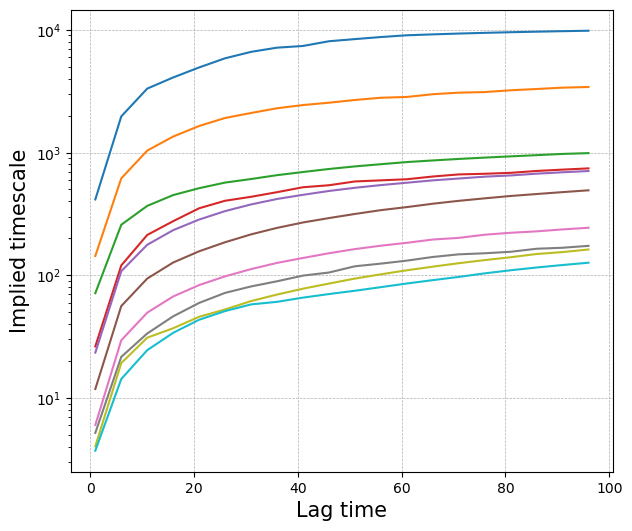

PyObject Text(30.000000000000007, 0.5, 'Implied timescale')

In [59]:
#pyplot(size=(400,300))
#plot(tau, implied_time[:, 1:10], framestyle=:box, yaxis=:log, label=nothing)
#xlabel!("delay tau"); ylabel!("implied time")

fig, ax = subplots(figsize=(7, 6))
p = ax.semilogy(tau, implied_time[:, 1:10])
#cbar = fig.colorbar(p, ax=ax)
#ax.colorbar()
ax.grid(linestyle="--", linewidth=0.5);
xlabel("Lag time",fontsize=15)
ylabel("Implied timescale",fontsize=15)

In [63]:
using BSON: @save, @load

@save "msm.bson" T p TICA CLUST t